In [5]:
# Save topology with carbon alphas 
joined_traj=md.load("/net/jam-amaro-shared/bccgc4/CatSMD/md1/1.nc", top="/net/jam-amaro-shared/bccgc4/Strided_Traj/system.prmtop",stride=100)
selection=joined_traj.topology.select("protein")
joined_traj=joined_traj.atom_slice(selection)
    
first_frame=joined_traj[0]
first_frame.save_hdf5("/net/jam-amaro-shared/bccgc4/Strided_Traj/CA_Aligned_Traj/protein.h5")

In [ ]:
#Start 

In [1]:
import pyemma
import glob
import numpy as np
import pyemma.plots as mplt
%pylab inline
import mdtraj as md
import pyemma.coordinates as coor
 
def average_by_state(dtraj, x, nstates):
    assert(len(dtraj) == len(x))
    N = len(dtraj)
    res = np.zeros((nstates))
    for i in range(nstates):
        I = np.argwhere(dtraj == i)[:,0]
        res[i] = np.mean(x[I])
    return res
 
def avg_by_set(x, sets):
    # compute mean positions of sets. This is important because of some technical points the set order
    # in the coarse-grained TPT object can be different from the input order.
    avg = np.zeros(len(sets))
    for i in range(len(sets)):
        I = list(sets[i])
        avg[i] = np.mean(x[I])
    return avg


Populating the interactive namespace from numpy and matplotlib


In [2]:
traj=md.load("/net/jam-amaro-shared/bccgc4/Strided_Traj/CA_Aligned_Traj/joined_traj_CA.xtc",top="/net/jam-amaro-shared/bccgc4/Strided_Traj/CA_Aligned_Traj/protein_ca.h5")

In [3]:
Traj=md.load("/net/jam-amaro-shared/bccgc4/Strided_Traj/CA_Aligned_Traj/joined_traj_ALL.xtc", top="protein.h5")

In [4]:
print(traj)
print(Traj)

<mdtraj.Trajectory with 450000 frames, 218 atoms, 218 residues, and unitcells>
<mdtraj.Trajectory with 450000 frames, 3324 atoms, 220 residues, and unitcells>


In [5]:
trajfile="/net/jam-amaro-shared/bccgc4/Strided_Traj/CA_Aligned_Traj/joined_traj_CA.xtc"
topfile="/net/jam-amaro-shared/bccgc4/Strided_Traj/CA_Aligned_Traj/protein_ca.h5"
feat = coor.featurizer(topfile)
feat.add_all()
print(feat.describe()[:13])
inp = coor.source(trajfile, feat)
print(inp)
print('trajectory length = ',inp.trajectory_length(0))
print('number of dimension = ',inp.dimension())

['ATOM:ILE 1 CA 0 x', 'ATOM:ILE 1 CA 0 y', 'ATOM:ILE 1 CA 0 z', 'ATOM:LEU 2 CA 1 x', 'ATOM:LEU 2 CA 1 y', 'ATOM:LEU 2 CA 1 z', 'ATOM:PRO 3 CA 2 x', 'ATOM:PRO 3 CA 2 y', 'ATOM:PRO 3 CA 2 z', 'ATOM:ASP 4 CA 3 x', 'ATOM:ASP 4 CA 3 y', 'ATOM:ASP 4 CA 3 z', 'ATOM:SER 5 CA 4 x']
trajectory length =  450000
number of dimension =  654


Text(0,0.5,'principal comp. 2')

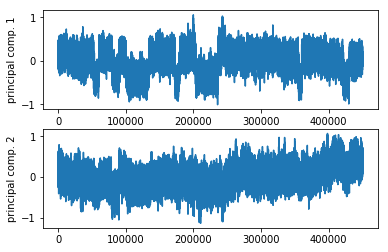

In [6]:
pca_obj=coor.pca(inp, dim= -1, var_cutoff=0.95) #0.95--> 220 dimensions
Ypca = pca_obj.get_output()[0]
subplot2grid((2,1),(0,0))
plot(Ypca[:,0])
ylabel('principal comp. 1')
subplot2grid((2,1),(1,0))
plot(Ypca[:,1])
ylabel('principal comp. 2')

In [7]:
cl = coor.cluster_kmeans(data=Ypca,k=10,max_iter=5000)

dtrajs = cl.dtrajs
cc_x = cl.clustercenters[:,0]
cc_y = cl.clustercenters[:,1]
 
print(dtrajs)
print(np.size(dtrajs))

[array([8, 8, 8, ..., 5, 5, 5], dtype=int32)]
450000


[-0.28621277  0.21395469 -0.41551232 -0.4228794   0.10512832 -0.01284867
  0.38350883  0.0655138   0.17961986 -0.01501886]
[-0.3817957  -0.14685762 -0.15285389 -0.09567524 -0.00312877  0.34447464
 -0.38558042  0.04742773  0.05320267  0.2498875 ]


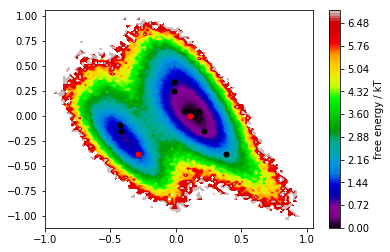

In [8]:
mplt.plot_free_energy(np.vstack(Ypca)[:,0], np.vstack(Ypca)[:,1])
cc_x = cl.clustercenters[:,0]
cc_y = cl.clustercenters[:,1]
plot(cc_x,cc_y, linewidth=0, marker='o', markersize=5, color='black')

print(cc_x)
print(cc_y)

plot(cc_x[4], cc_y[4],linewidth=0, marker='o', markersize=5, color="red")
plot(cc_x[0], cc_y[0],linewidth=0, marker='o', markersize=5, color="red")


In [9]:
print(np.size(pca_obj.cumvar))
print(pca_obj.cumvar)
print(np.size(Ypca[0]))

654
[0.07573777 0.14952137 0.21001823 0.26461775 0.30425511 0.33788685
 0.37067766 0.39908865 0.4236977  0.44559999 0.46534869 0.48230813
 0.49595863 0.50914195 0.52190547 0.53366943 0.54469593 0.55519262
 0.5653002  0.57508912 0.58450993 0.5936246  0.60211781 0.60996335
 0.61751169 0.62489677 0.6319892  0.63877909 0.64533503 0.65146592
 0.65745521 0.66339269 0.66917078 0.67476031 0.67999893 0.68507088
 0.69007733 0.69502159 0.69970185 0.704331   0.7089408  0.71328756
 0.71748908 0.72164409 0.72566032 0.72960543 0.73348551 0.73724246
 0.74092347 0.74454971 0.74805412 0.75146123 0.75480336 0.7580454
 0.76126019 0.76438064 0.76748771 0.77048012 0.77342147 0.77626343
 0.77900798 0.78170696 0.78439327 0.78700773 0.78961513 0.79213361
 0.79454    0.79692952 0.79929551 0.80164846 0.80396644 0.80626205
 0.80851933 0.81068541 0.81284465 0.8149441  0.81698712 0.81901295
 0.82099979 0.82295445 0.82488484 0.82677379 0.82864691 0.83048648
 0.83229853 0.83408941 0.83586668 0.83761657 0.83932513 0.8

In [10]:
print(dtrajs)
dtraj=max(dtrajs)
print(dtraj)
print(max(dtraj))

[array([8, 8, 8, ..., 5, 5, 5], dtype=int32)]
[8 8 8 ... 5 5 5]
9


In [ ]:
#From here on it's clustering and extracting centroids, as well as saving out the centroid coords

In [11]:
Clusters={}

for count in range(0,10):
    frames=[]
    indices = [d for d, x in enumerate(dtraj) if x == count]
    frames.append(indices)
    Clusters[count]=frames


In [12]:
% store Clusters

Stored 'Clusters' (dict)


In [14]:
for key in Clusters:
    print(key)
    a=Traj[Clusters[key]]

    a.save_xtc('PCA/Trajectories/Traj_0.95-'+str(key)+".xtc")
    print(a)

0


/opt/anaconda3/lib/python3.6/site-packages/mdtraj/core/trajectory.py:1118: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  xyz = self.xyz[key]
/opt/anaconda3/lib/python3.6/site-packages/mdtraj/core/trajectory.py:1119: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  time = self.time[key]
/opt/anaconda3/lib/python3.6/site-packages/mdtraj/core/trajectory.py:1123: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array in

<mdtraj.Trajectory with 33669 frames, 3324 atoms, 220 residues, and unitcells>
1
<mdtraj.Trajectory with 68566 frames, 3324 atoms, 220 residues, and unitcells>
2
<mdtraj.Trajectory with 36335 frames, 3324 atoms, 220 residues, and unitcells>
3
<mdtraj.Trajectory with 30816 frames, 3324 atoms, 220 residues, and unitcells>
4
<mdtraj.Trajectory with 65293 frames, 3324 atoms, 220 residues, and unitcells>
5
<mdtraj.Trajectory with 54965 frames, 3324 atoms, 220 residues, and unitcells>
6
<mdtraj.Trajectory with 13797 frames, 3324 atoms, 220 residues, and unitcells>
7
<mdtraj.Trajectory with 38100 frames, 3324 atoms, 220 residues, and unitcells>
8
<mdtraj.Trajectory with 55393 frames, 3324 atoms, 220 residues, and unitcells>
9
<mdtraj.Trajectory with 53066 frames, 3324 atoms, 220 residues, and unitcells>


In [15]:
avg = [100, 100, 100, 100, 100,100, 100, 100, 100, 100]
indices = np.zeros(10)
for i in range(len(Ypca)):
    c = cl.clustercenters[cl.dtrajs[0][i]]

    
    v = Ypca[i]
    
    newavg = np.linalg.norm(c-v)
   
    if avg[cl.dtrajs[0][i]] > newavg:
        avg[cl.dtrajs[0][i]] = newavg
        indices[cl.dtrajs[0][i]] = i
        
print(avg)
print(indices)

for i in range(len(avg)):
    Traj[i].save_pdb('PCA/CENTROID_0.95-%s.pdb' % i)

[0.548103, 0.50938505, 0.49911138, 0.5124164, 0.5219056, 0.5485285, 0.60328215, 0.5256266, 0.52409995, 0.5288023]
[211834. 293394. 132319. 102757. 347789. 437198. 199382.  16634.  91541.
 303274.]
